<a href="https://colab.research.google.com/github/Jaeek27/Data-Science-Projects/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm    
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics

In [ ]:
jaee = pd.read_csv("/content/LR German Credit Data.csv")

In [ ]:
jaee1 =list(jaee.columns)

In [ ]:
jaee1.remove('status')  ## Removed dep variable

In [ ]:
jaee1

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [ ]:
encoded_jaee = pd.get_dummies(jaee[jaee1],drop_first = True)

In [ ]:
y = jaee.status
x = encoded_jaee

In [ ]:
## Splitting the data set
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
## Decision tree using gini criteria 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [ ]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
## Measuring test accuracy 
tree_predict = clf_tree.predict(x_test) 
metrics.roc_auc_score(y_test, tree_predict) 

0.5835743204164258

In [ ]:
## Displaying Tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

In [ ]:
# Export the tree into odt file 
export_graphviz(clf_tree, out_file = "chd_tree.odt", feature_names = x_train.columns, class_names = ['Good Credit', ' Bad Credit'], filled = True)

In [ ]:
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.odt') 
chd_tree_graph.write_jpg('chd_tree.png')

True

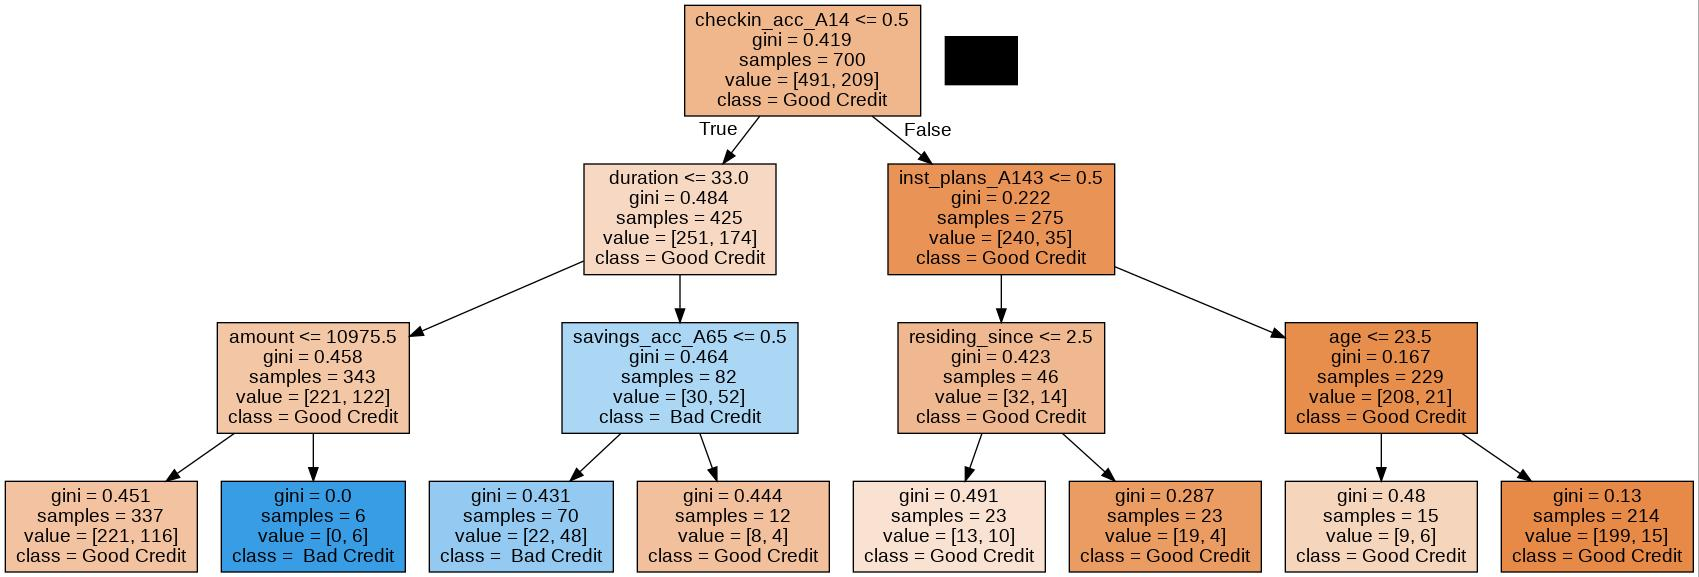

In [ ]:
# Render the png file
Image(filename='chd_tree.png')

In [ ]:
## Calculating gini impurity
gini_node_1 = 1 - pow(491/700, 2) - pow(209/700, 2) 
print(round(gini_node_1, 4))

0.4189


In [ ]:
## Building Decision Tree using Entropy Criteria

In [ ]:
clf_tree_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf_tree_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Export the tree into odt file
export_graphviz(clf_tree_entropy, out_file = "chd_tree_entropy.odt", feature_names = x_train.columns, class_names = ['Good Credit', ' Bad Credit'], filled = True)

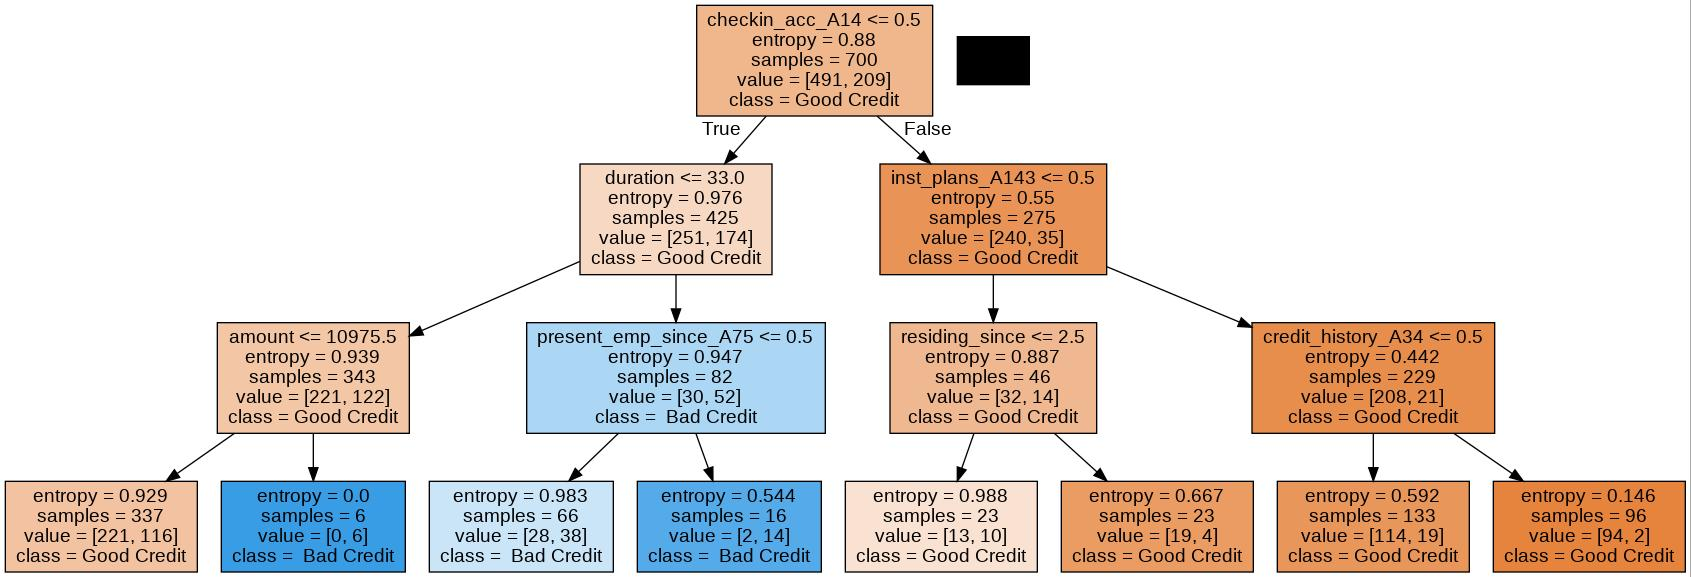

In [ ]:
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree_entropy.odt') 
chd_tree_graph.write_jpg ('chd_tree_entropy.png')

# Render the png file
Image(filename='chd_tree_entropy.png')

In [ ]:
## Calculating entrophy

import math
entropy_node_1 = - (491/700)*math.log2(491/700) - (209/700)*math.log2(209/700)
print(round(entropy_node_1, 2))

0.88


In [ ]:
## Measuring Test Accuracy using AUC
tree_predict = clf_tree_entropy.predict(x_test) 
metrics.roc_auc_score(y_test, tree_predict)

0.5763972869236027

In [ ]:
# Finding Optimal Criteria and Max Depth

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'], 'max_depth': range(2,28)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree, tuned_parameters, cv=10, scoring='roc_auc')
clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 28)}],
             scoring='roc_auc')

In [ ]:
clf.best_score_

0.6833090864917397

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [ ]:
## With new rules

In [ ]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)

In [ ]:
clf_tree.fit(x_train, y_train)
tree_predict = clf_tree.predict(x_test) 
metrics.roc_auc_score(y_test, tree_predict) 

0.5713497029286503

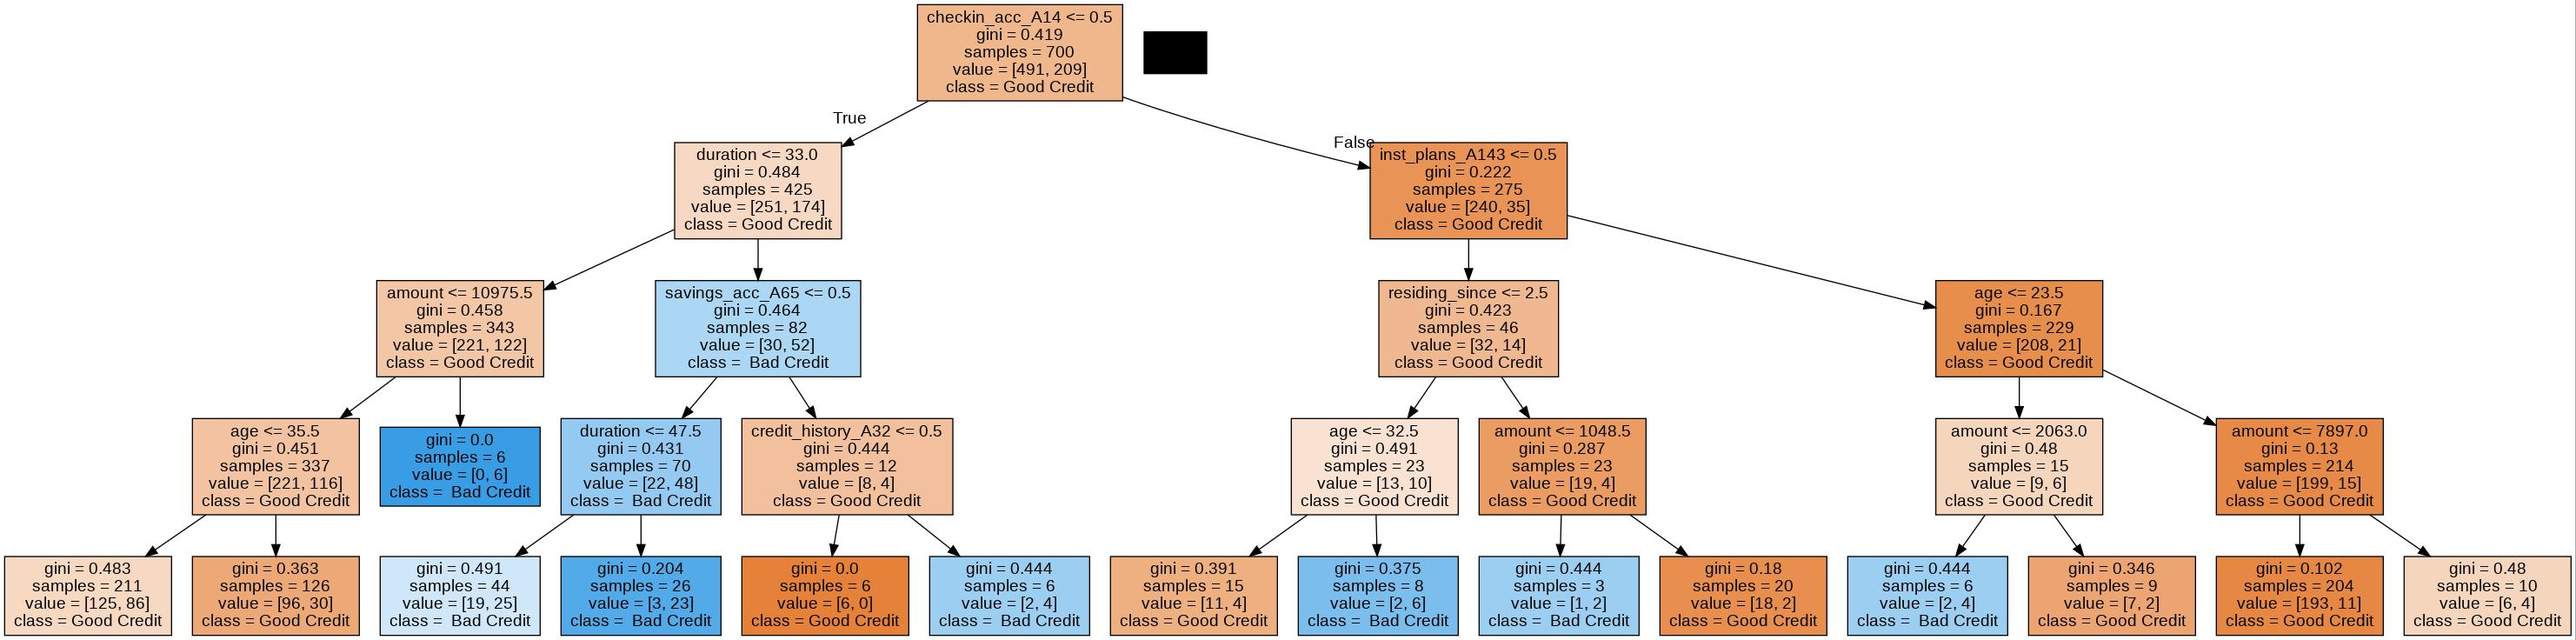

In [ ]:
export_graphviz(clf_tree, out_file = "chd_tree.odt", feature_names = x_train.columns, class_names = ['Good Credit', ' Bad Credit'], filled = True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.odt') 
chd_tree_graph.write_jpg('chd_tree.png')
Image(filename='chd_tree.png')